# Deep Learning

## Concept

One of goal of the deep learning algorithm is to find the best function with minimum lost value. Rather than manually adjusting the `weight` and `bias` of the function, we can use the `gradient descent` algorithm to find the best function.

`y = ax + b`

`a` is the weight and `b` is the bias.

In the case of three variables:

`z = ax + by + c`

`a` and `b` are the weights and `c` is the bias.

In [ ]:
import numpy as np

x_data = np.random.rand(100) * 10
noise = np.random.normal(0, 2, x_data.shape)
y_data = 3*x_data + 8 + noise

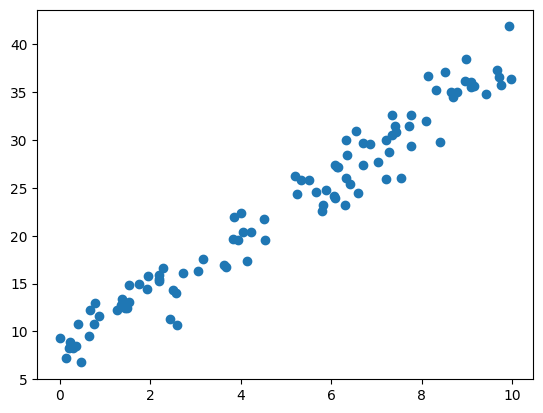

In [ ]:
# plot the data

import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.show()


Now let's create a simple neural network to *automatically* find the best function.

(You may skip the code at this moment, we will explain it in the next section.)

In [ ]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')


epoch 1, loss 634.9247, w 2.6423, b 1.3815
epoch 11, loss 13.7847, w 3.9210, b 1.9116
epoch 21, loss 12.7600, w 3.8742, b 2.2269
epoch 31, loss 11.8386, w 3.8297, b 2.5259
epoch 41, loss 11.0100, w 3.7875, b 2.8095
epoch 51, loss 10.2649, w 3.7475, b 3.0784
epoch 61, loss 9.5949, w 3.7096, b 3.3334
epoch 71, loss 8.9924, w 3.6736, b 3.5752
epoch 81, loss 8.4506, w 3.6395, b 3.8044
epoch 91, loss 7.9635, w 3.6072, b 4.0219


Text(0.5, 1.0, 'y = 3.5795x + 4.2079')

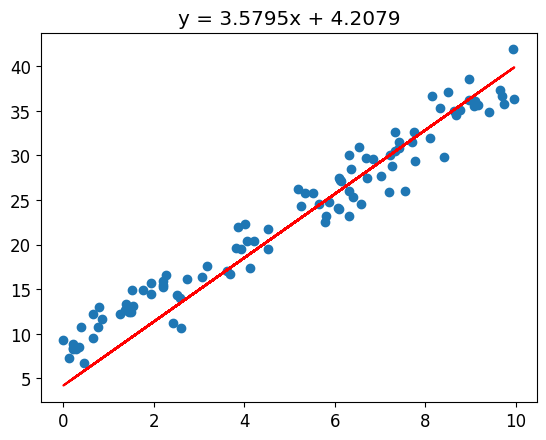

In [ ]:
# Plot the result
plt.scatter(x_data, y_data)
plt.plot(x_data, model(x_tensor).detach().numpy(), 'r')

plt.title('y = {:.4f}x + {:.4f}'.format(model.linear.weight.item(), model.linear.bias.item()))

Let's continue with more epoch

In [ ]:

for epoch in range(200):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')

epoch 1, loss 7.5254, w 3.5765, b 4.2280
epoch 11, loss 7.1314, w 3.5474, b 4.4236
epoch 21, loss 6.7772, w 3.5198, b 4.6090
epoch 31, loss 6.4587, w 3.4937, b 4.7848
epoch 41, loss 6.1722, w 3.4689, b 4.9515
epoch 51, loss 5.9146, w 3.4454, b 5.1096
epoch 61, loss 5.6830, w 3.4231, b 5.2595
epoch 71, loss 5.4747, w 3.4019, b 5.4017
epoch 81, loss 5.2874, w 3.3819, b 5.5365
epoch 91, loss 5.1190, w 3.3628, b 5.6643
epoch 101, loss 4.9676, w 3.3448, b 5.7856
epoch 111, loss 4.8314, w 3.3277, b 5.9005
epoch 121, loss 4.7089, w 3.3115, b 6.0095
epoch 131, loss 4.5988, w 3.2961, b 6.1129
epoch 141, loss 4.4998, w 3.2815, b 6.2109
epoch 151, loss 4.4107, w 3.2677, b 6.3039
epoch 161, loss 4.3306, w 3.2546, b 6.3920
epoch 171, loss 4.2586, w 3.2422, b 6.4756
epoch 181, loss 4.1939, w 3.2304, b 6.5549
epoch 191, loss 4.1357, w 3.2192, b 6.6300


Text(0.5, 1.0, 'y = 3.2096x + 6.6944')

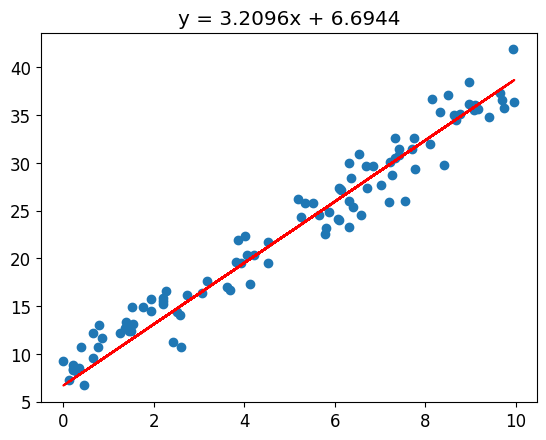

In [ ]:
# Plot the result
plt.scatter(x_data, y_data)
plt.plot(x_data, model(x_tensor).detach().numpy(), 'r')

plt.title('y = {:.4f}x + {:.4f}'.format(model.linear.weight.item(), model.linear.bias.item()))

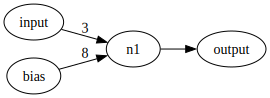

In [ ]:
from fastbook import *

#Visualize the neural network, input -> node -> output
gv('''
input -> "n1" [label=3]
bias -> "n1" [label=8]
"n1" -> output
''')

Experiment more here: https://playground.tensorflow.org/

## Non Linear Function

Some problems doesn't have linear relationship. In this case, linear function is not enough to solve the problem. We need to use non-linear function.

Example:

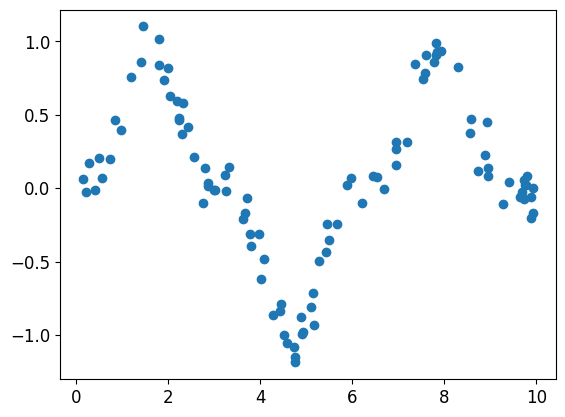

In [ ]:
# create a non linear data with single feature
# y = sin(x) + noise

x_data = np.random.rand(100) * 10
noise = np.random.normal(0, 0.1, x_data.shape)
y_data = np.sin(x_data) ** 3 + noise

# plot the data
plt.scatter(x_data, y_data)
plt.show()


In [ ]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')


epoch 1, loss 14.1075, w 0.2398, b -0.4101
epoch 11, loss 0.3650, w 0.0678, b -0.4115
epoch 21, loss 0.3599, w 0.0645, b -0.3891
epoch 31, loss 0.3552, w 0.0614, b -0.3679
epoch 41, loss 0.3510, w 0.0584, b -0.3476
epoch 51, loss 0.3472, w 0.0555, b -0.3282
epoch 61, loss 0.3437, w 0.0528, b -0.3098
epoch 71, loss 0.3405, w 0.0502, b -0.2922
epoch 81, loss 0.3376, w 0.0478, b -0.2754
epoch 91, loss 0.3349, w 0.0454, b -0.2594


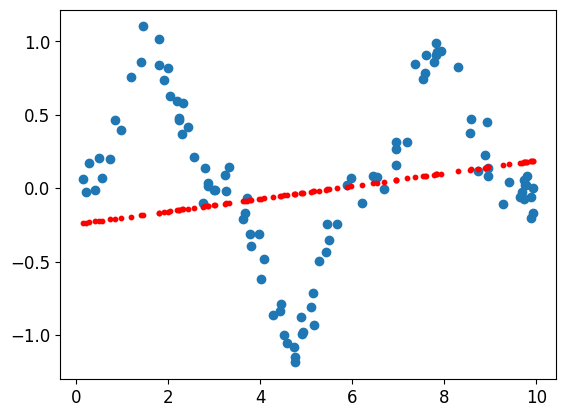

In [ ]:
# Plot the model
plt.scatter(x_data, y_data)
plt.scatter(x_data, model(x_tensor).detach().numpy(), s=10, c='r')

plt.show()

Our linear function is not good enough. How about if we add more layer?

In [ ]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(1, 10)
        self.linear_2 = torch.nn.Linear(10, 10)
        self.linear_3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        return self.linear_3(self.linear_2(self.linear_1(x)))


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch}, loss {l.item():.4f}')


epoch 0, loss 0.4440
epoch 10, loss 0.3502
epoch 20, loss 0.3346
epoch 30, loss 0.3250
epoch 40, loss 0.3191
epoch 50, loss 0.3153
epoch 60, loss 0.3129
epoch 70, loss 0.3114
epoch 80, loss 0.3104
epoch 90, loss 0.3098


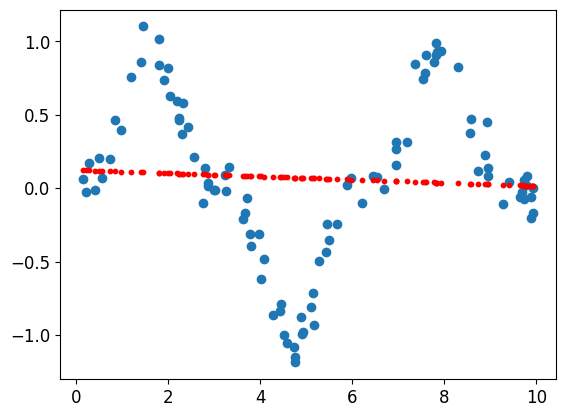

In [ ]:
# Plot the model
plt.scatter(x_data, y_data)
plt.scatter(x_data, model(x_tensor).detach().numpy(), s=10, c='r')

plt.show()

Hmm not good enough, we need to add non-linearity to our function.

In [ ]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(1, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        return self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x)))))


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(10000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'epoch {epoch}, loss {l.item():.4f}')


epoch 0, loss 0.3111
epoch 1000, loss 0.1667
epoch 2000, loss 0.1191
epoch 3000, loss 0.1051
epoch 4000, loss 0.0926
epoch 5000, loss 0.0755
epoch 6000, loss 0.0586
epoch 7000, loss 0.0456
epoch 8000, loss 0.0352
epoch 9000, loss 0.0280


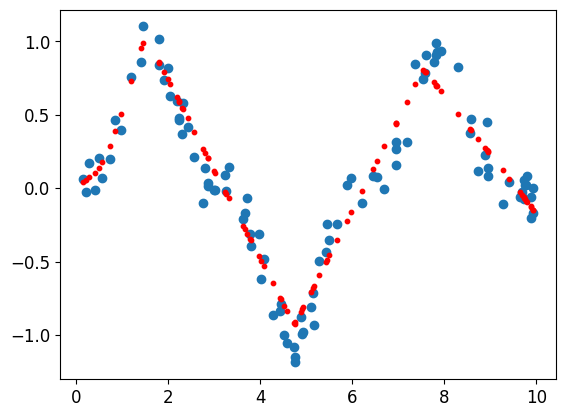

In [ ]:
plt.scatter(x_data, y_data)
# Plot the model output using scatter plot
plt.scatter(x_data, model(x_tensor).detach().numpy(), s=10, c='r')

plt.show()

## Non Linear Function (3D)

How about non linear with two variables?


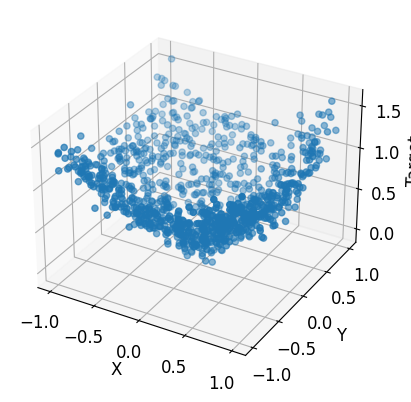

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate circle data set for regression
n_samples = 1000
X = np.random.rand(n_samples, 2) * 2 - 1
y = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
# add noise to y
y += 0.1 * np.random.randn(n_samples)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

plt.show()

In [ ]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(2, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        # self.relu = torch.nn.ReLU()

    def forward(self, x):
        # return self.relu(self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x))))))
        return self.linear_3(self.linear_2(self.linear_1(x)))

loss = torch.nn.MSELoss()

model = MySimpleNeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().view(-1, 1)

for epoch in range(1000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}')


epoch 1, loss 0.8750
epoch 101, loss 0.0946
epoch 201, loss 0.0946
epoch 301, loss 0.0946
epoch 401, loss 0.0946
epoch 501, loss 0.0946
epoch 601, loss 0.0946
epoch 701, loss 0.0946
epoch 801, loss 0.0946
epoch 901, loss 0.0946


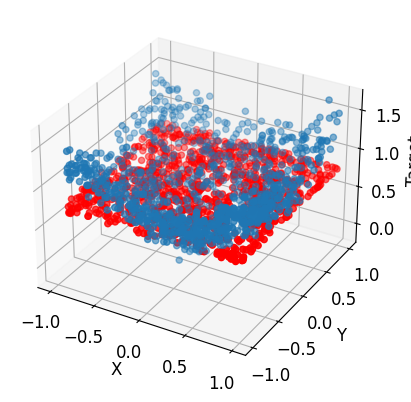

In [ ]:
# Plot the result


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

# draw the model
ax.scatter(X[:, 0], X[:, 1], model(x_tensor).detach().numpy(), c='r')

plt.show()

In [ ]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(2, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        return self.relu(self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x))))))

loss = torch.nn.MSELoss()

model = MySimpleNeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().view(-1, 1)

for epoch in range(1000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}')


epoch 1, loss 0.6848
epoch 101, loss 0.0101
epoch 201, loss 0.0095
epoch 301, loss 0.0093
epoch 401, loss 0.0092
epoch 501, loss 0.0090
epoch 601, loss 0.0089
epoch 701, loss 0.0088
epoch 801, loss 0.0088
epoch 901, loss 0.0088


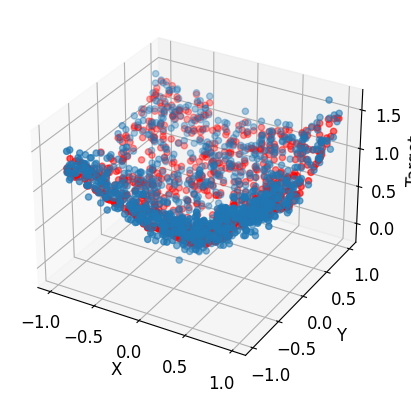

In [ ]:
# Plot the result


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

# draw the model
ax.scatter(X[:, 0], X[:, 1], model(x_tensor).detach().numpy(), c='r')

plt.show()